Solution (1) Single formant Resonator can be modeled by two poles systems i.e second order transfer function where the poles of the system represents resonance of vocal tract known as formants.
Transfer Function is given by H(Z) = 1/(1-2rcos(theta)z^-1 + r^2*Z^-2)

where r = exp(-pi*B1*Ts)

theta = 2*pi*F1*Ts 

impulse Response h(n) = exp(-pi*B1*t)*sin(2pi*F1*t)

Value of r1 is 0.9614911598014075
Value of theta1 is 0.3534291735288517 rad
/frequency response/


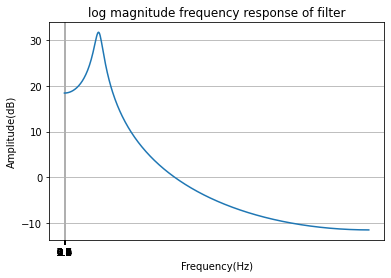

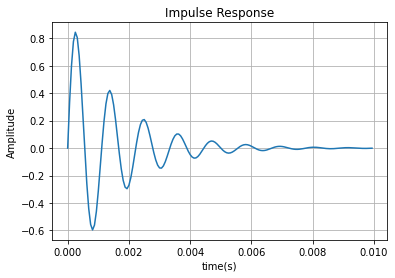

In [54]:
#SOLUTION 1 PLOTTING FREQUENCY RESPONSE AND IMPULSE RESPONSE OF SINGLE FORMANT RESONATOR
import math
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import freqz
from scipy.signal import sosfreqz
def Single_Formant(F1, B1, Fs):

        Ts = 1.0/Fs
        r1 = np.exp(-1*np.pi*B1*Ts) # pole radius,
        theta1 = 2*np.pi*F1*Ts # pole angle,
        print('Value of r1 is '+str(r1))
        print('Value of theta1 is '+str(theta1)+' rad')
        denom = [1, -2*r1*np.cos(theta1), np.square(r1)]
        return denom
F1 = 900
B1 = 200
Fs= 16000
denom = Single_Formant(F1, B1, Fs)
w, H = freqz([1], denom, whole = False) 
print('/frequency response/')
Ts = 1/Fs
f = w*(Fs/(2*np.pi))
H = 20*np.log10(np.abs(H))
plt.figure(1)
plt.plot(f, H) # plot the log magnitude frequency response of filter,
plt.xlabel('Frequency(Hz)')
plt.xticks(np.arange(0 , np.pi ,0.1))
plt.ylabel('Amplitude(dB)')
plt.title('magnitude frequency response of filter for F1 = 900')
plt.grid(True)
          
plt.figure(2)   
t = np.arange(0,0.01, Ts)
h = np.exp(-1.0*np.pi*B1*t)*np.sin(2.0*np.pi*F1*t)
plt.plot(t, h) # plot the filter impulse response ,
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.grid(True)
plt.show()

Solition (2) Generating a source (triangular)impulse train and plots the waveform

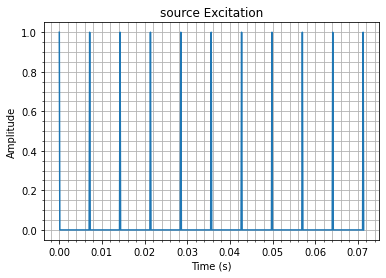

In [62]:
#Generating a source (triangular)impulse train and plots the waveform
import math
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import freqz
from scipy.signal import sosfreqz
def generate_source(F0, Fs, duration):

    
        Ts=1.0/Fs
        source = np.zeros(int(duration/Ts)) # initialize source signal array with length = dur sec = dur*Fs samples",
        interval = int((1.0/F0)/Ts) # spacing between two consecutive impulses (in samples)",
        locs = np.arange(0, len(source), interval) # locations of impulse,
        source[locs-1] = 0.5
        source[locs] = 1
        source[locs+1] = 0.5
        return source
F0 = 140
Fs =16000
duration = 0.5
source = generate_source(F0,Fs, duration)

Ts = 1/Fs
plt.figure(1)
t = np.arange(0, 10.0/F0, Ts)
plt.plot(t,source[:len(t)])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('source Excitation')
plt.minorticks_on()
plt.grid(which='both')
plt.show()

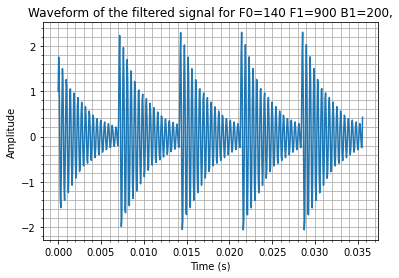

In [63]:
# output of passing a source excitation signal through a filter
import IPython.display as ipd
def filter_lti(source, denom, F0, Fs):
        #F0, Fs - F0 of the signal and sampling rate (for plotting purposes),
        
        #Returns the output of passing a source excitation signal through a filter,
        #Uses the difference equation method to apply the LTI filter,
        
        Ts=1.0/Fs,
       
        
        y = np.zeros(len(source))  
        y[0] = source[0]
        y[1] = source[1] - denom[1]*y[0]
        for i in range(2,len(y)):
            y[i] = source[i] - denom[1]*y[i-1] - denom[2]*y[i-2]
        return y
            # plot first 5 cycles of the audio signal,
noCycles = 5
y = filter_lti(source, denom, F0, Fs)
plt.figure()
interval = int((1.0/F0)/Ts)
plt.plot(t[:noCycles*interval], y[:noCycles*interval])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('Waveform of the filtered signal for F0=140 F1=900 B1=200,')
plt.minorticks_on()
plt.grid(which='both')
plt.show()
ipd.display(ipd.Audio(data=y, rate=Fs))

Solution 3 a) F0 = 120 Hz, F1 = 300 Hz, B1 = 100 Hz

Value of r1 is 0.9805565561462569
Value of theta1 is 0.11780972450961724 rad
/frequency response/


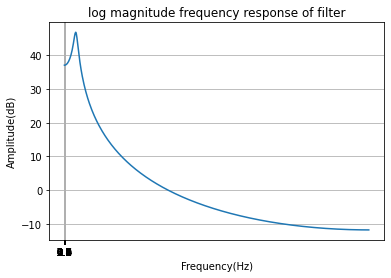

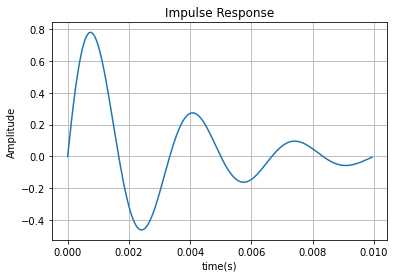

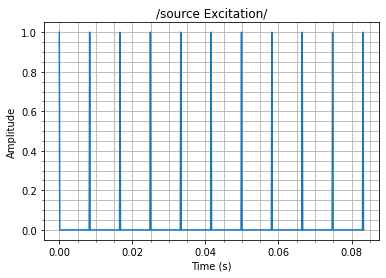

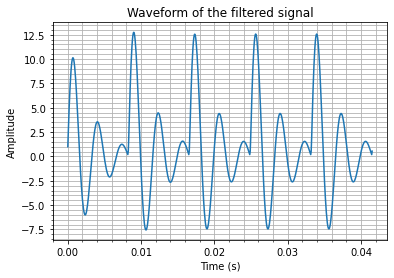

In [ ]:
denom = Single_Formant(F1, B1, Fs)
source = generate_source(F0,Fs, duration)
y = filter_lti(source, denom, F0, Fs)
F0 = 120
F1 = 300
B1 = 100
Fs = 16000
w, H = freqz([1], denom, whole = False) 
print('/frequency response/')
Ts = 1/Fs
f = w*(Fs/(2*np.pi))
H = 20*np.log10(np.abs(H))
plt.figure(1)
plt.plot(f, H) # plot the log magnitude frequency response of filter,
plt.xlabel('Frequency(Hz)')
plt.xticks(np.arange(0 , np.pi ,0.1))
plt.ylabel('Amplitude(dB)')
plt.title('magnitude frequency response of filter F1 = 300 Hz, B1 = 100 Hz')
plt.grid(True)
          
plt.figure(2)   
t = np.arange(0,0.01, Ts)
h = np.exp(-1.0*np.pi*B1*t)*np.sin(2.0*np.pi*F1*t)
plt.plot(t, h) # plot the filter impulse response ,
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.grid(True)
plt.show()

plt.figure(3)
t = np.arange(0, 10.0/F0, Ts)
plt.plot(t,source[:len(t)])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('/source Excitation/')
plt.minorticks_on()
plt.grid(which='both')
plt.show()

plt.figure(4)
interval = int((1.0/F0)/Ts)
plt.plot(t[:noCycles*interval], y[:noCycles*interval])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('Waveform of the filtered signal')
plt.minorticks_on()
plt.grid(which='both')
plt.show()
ipd.display(ipd.Audio(data=y, rate=Fs))

Solution 3 b) F0 = 120 Hz, F1=1200 Hz, B1 = 200 Hz

Value of r1 is 0.9805565561462569
Value of theta1 is 0.11780972450961724 rad
/frequency response/


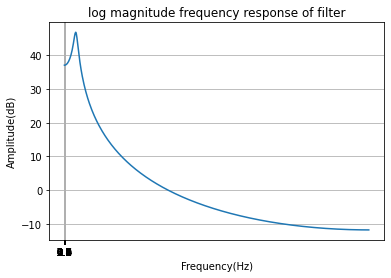

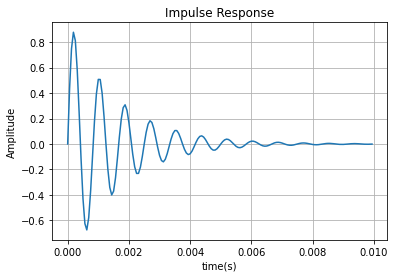

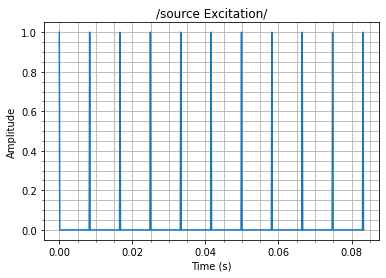

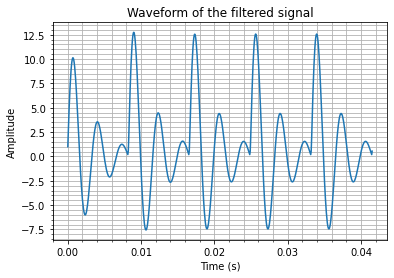

In [ ]:
denom = Single_Formant(F1, B1, Fs)
source = generate_source(F0,Fs, duration)
y = filter_lti(source, denom, F0, Fs)
F0 = 120
F1 = 1200
B1 = 200
Fs = 16000
w, H = freqz([1], denom, whole = False) 
print('/frequency response/')
Ts = 1/Fs
f = w*(Fs/(2*np.pi))
H = 20*np.log10(np.abs(H))
plt.figure(1)
plt.plot(f, H) # plot the log magnitude frequency response of filter,
plt.xlabel('Frequency(Hz)')
plt.xticks(np.arange(0 , np.pi ,0.1))
plt.ylabel('Amplitude(dB)')
plt.title('log magnitude frequency response of filter')
plt.grid(True)
          
plt.figure(2)   
t = np.arange(0,0.01, Ts)
h = np.exp(-1.0*np.pi*B1*t)*np.sin(2.0*np.pi*F1*t)
plt.plot(t, h) # plot the filter impulse response ,
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.grid(True)
plt.show()

plt.figure(3)
t = np.arange(0, 10.0/F0, Ts)
plt.plot(t,source[:len(t)])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('/source Excitation/')
plt.minorticks_on()
plt.grid(which='both')
plt.show()

plt.figure(4)
interval = int((1.0/F0)/Ts)
plt.plot(t[:noCycles*interval], y[:noCycles*interval])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('Waveform of the filtered signal')
plt.minorticks_on()
plt.grid(which='both')
plt.show()
ipd.display(ipd.Audio(data=y, rate=Fs))

Solution 3 C) F0 = 180 Hz, F1 = 300 Hz, B1 = 100 Hz

Value of r1 is 0.9614911598014075
Value of theta1 is 0.47123889803846897 rad
/frequency response/


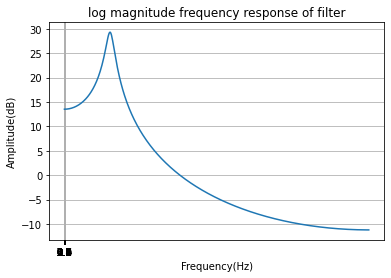

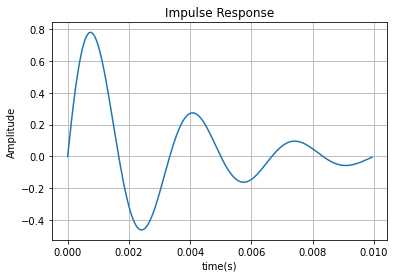

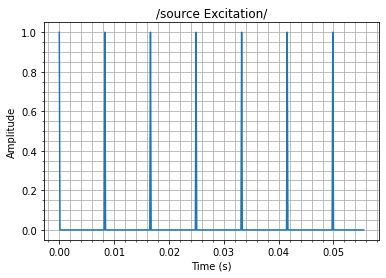

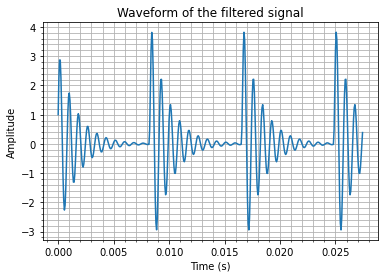

In [ ]:
denom = Single_Formant(F1, B1, Fs)
source = generate_source(F0,Fs, duration)
y = filter_lti(source, denom, F0, Fs)
F0 = 180
F1 = 300
B1 = 100
Fs = 16000
w, H = freqz([1], denom, whole = False) 
print('/frequency response/')
Ts = 1/Fs
f = w*(Fs/(2*np.pi))
H = 20*np.log10(np.abs(H))
plt.figure(1)
plt.plot(f, H) # plot the log magnitude frequency response of filter,
plt.xlabel('Frequency(Hz)')
plt.xticks(np.arange(0 , np.pi ,0.1))
plt.ylabel('Amplitude(dB)')
plt.title('log magnitude frequency response of filter')
plt.grid(True)
          
plt.figure(2)   
t = np.arange(0,0.01, Ts)
h = np.exp(-1.0*np.pi*B1*t)*np.sin(2.0*np.pi*F1*t)
plt.plot(t, h) # plot the filter impulse response ,
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.grid(True)
plt.show()

plt.figure(3)
t = np.arange(0, 10.0/F0, Ts)
plt.plot(t,source[:len(t)])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('/source Excitation/')
plt.minorticks_on()
plt.grid(which='both')
plt.show()

plt.figure(4)
interval = int((1.0/F0)/Ts)
plt.plot(t[:noCycles*interval], y[:noCycles*interval])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('Waveform of the filtered signal')
plt.minorticks_on()
plt.grid(which='both')
plt.show()
ipd.display(ipd.Audio(data=y, rate=Fs))

Solution 4 F0 = 120

Output of section d%i
/frequency response/


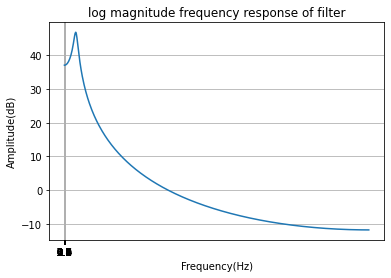

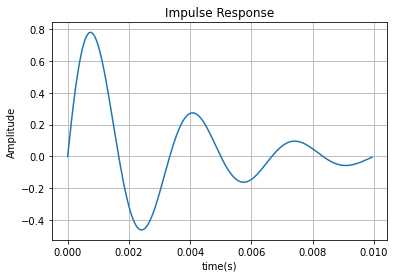

Output of section d%i
/frequency response/


<Figure size 432x288 with 0 Axes>

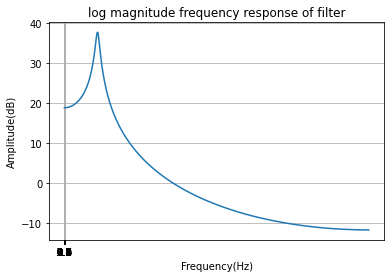

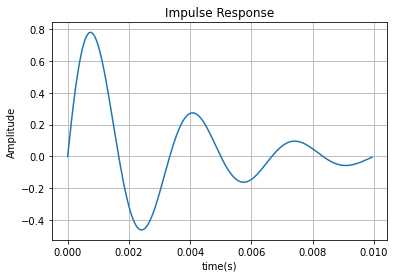

Output of section d%i
/frequency response/


<Figure size 432x288 with 0 Axes>

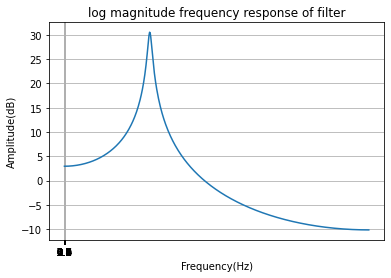

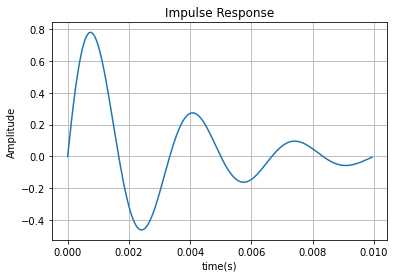

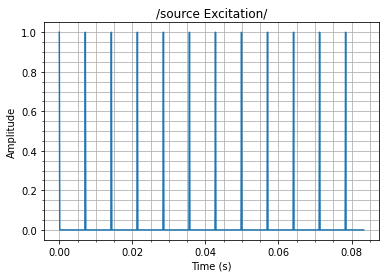

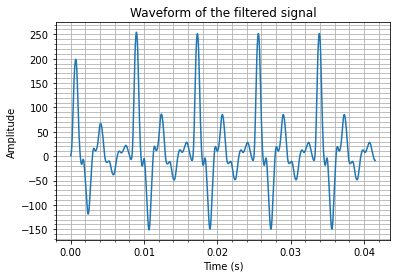

In [64]:
def generate_filter_3form(F0, F1, F2, F3, B1, Fs):
        Ts=1.0/Fs
        r1 = np.exp(-1*np.pi*B1*Ts)
        theta1 = 2*np.pi*F1*Ts
        theta2 = 2*np.pi*F2*Ts
        theta3 = 2*np.pi*F3*Ts
        denom1 = [1, -2*r1*np.cos(theta1), np.square(r1)]
        denom2 = [1, -2*r1*np.cos(theta2), np.square(r1)]
        denom3 = [1, -2*r1*np.cos(theta3), np.square(r1)]
        return (denom1, denom2, denom3)

F0 = 120
B1 = 100
formant_freqs = {'a':[730,1090,2440], 'i':[270, 2290, 3010], 'u':[300, 870, 2240]} 
vowel = 'u'    # pick a vowel - 'a' or 'i' or 'u'\n",
F1,F2,F3 = formant_freqs[vowel]
# Generate excitation signal,
x = generate_source(F0,Fs,duration)
ipd.display(ipd.Audio(data=x, rate=Fs))
# Obtain the denominator coefficients of each of the second-order sections,
denoms = generate_filter_3form(F0,F1,F2,F3,B1,Fs)
# Apply filters iteratively and plot output of each second-order filter,
y=x
i=1
for denom in denoms:
  print('Output of section d%i')
  i+=1
  y=filter_lti(y,denom,F0,Fs)
  denoms = generate_filter_3form(F0, F1, F2, F3, B1, Fs)
  w, H = freqz([1], denom, whole = False) 
  print('/frequency response/')
  Ts = 1/Fs
  f = w*(Fs/(2*np.pi))
  H = 20*np.log10(np.abs(H))
  plt.figure(1)
  plt.plot(f, H) # plot the log magnitude frequency response of filter,
  plt.xlabel('Frequency(Hz)')
  plt.xticks(np.arange(0 , np.pi ,0.1))
  plt.ylabel('Amplitude(dB)')
  plt.title('log magnitude frequency response of filter')
  plt.grid(True)
          
  plt.figure(2)   
  t = np.arange(0,0.01, Ts)
  h = np.exp(-1.0*np.pi*B1*t)*np.sin(2.0*np.pi*F1*t)
  plt.plot(t, h) # plot the filter impulse response ,
  plt.xlabel('time(s)')
  plt.ylabel('Amplitude')
  plt.title('Impulse Response')
  plt.grid(True)
  plt.show()
  plt.figure(3)
t = np.arange(0, 10.0/F0, Ts)
plt.plot(t,source[:len(t)])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('/source Excitation/')
plt.minorticks_on()
plt.grid(which='both')
plt.show()

plt.figure(4)
interval = int((1.0/F0)/Ts)
plt.plot(t[:noCycles*interval], y[:noCycles*interval])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('Waveform of the filtered signal')
plt.minorticks_on()
plt.grid(which='both')
plt.show()
ipd.display(ipd.Audio(data=y, rate=Fs))
  

Solution 4 with F0 = 220

Output of section d%i
/frequency response/


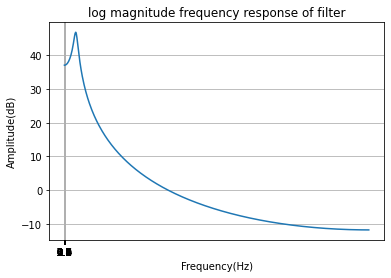

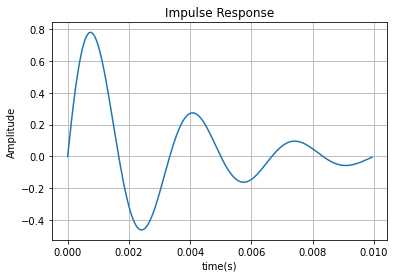

Output of section d%i
/frequency response/


<Figure size 432x288 with 0 Axes>

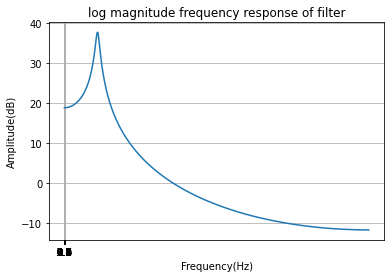

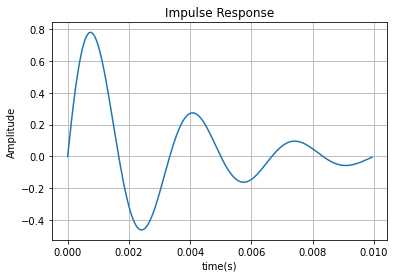

Output of section d%i
/frequency response/


<Figure size 432x288 with 0 Axes>

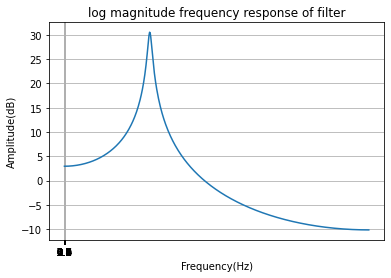

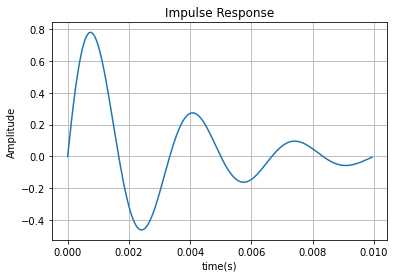

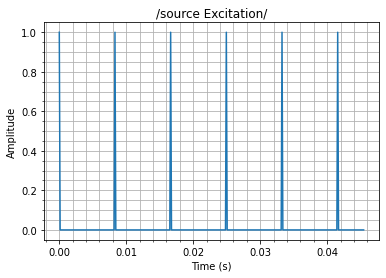

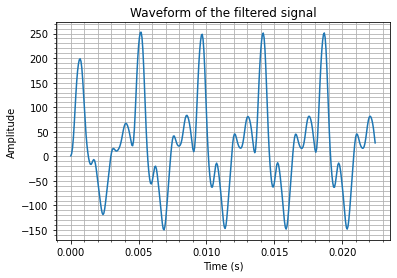

In [57]:
def generate_filter_3form(F0, F1, F2, F3, B1, Fs):
        Ts=1.0/Fs
        r1 = np.exp(-1*np.pi*B1*Ts)
        theta1 = 2*np.pi*F1*Ts
        theta2 = 2*np.pi*F2*Ts
        theta3 = 2*np.pi*F3*Ts
        denom1 = [1, -2*r1*np.cos(theta1), np.square(r1)]
        denom2 = [1, -2*r1*np.cos(theta2), np.square(r1)]
        denom3 = [1, -2*r1*np.cos(theta3), np.square(r1)]
        return (denom1, denom2, denom3)

F0 = 220
B1 = 100
formant_freqs = {'a':[730,1090,2440], 'i':[270, 2290, 3010], 'u':[300, 870, 2240]} 
vowel = 'u'    # pick a vowel - 'a' or 'i' or 'u'\n",
F1,F2,F3 = formant_freqs[vowel]
# Generate excitation signal,
x = generate_source(F0,Fs,duration)
ipd.display(ipd.Audio(data=x, rate=Fs))
# Obtain the denominator coefficients of each of the second-order sections,
denoms = generate_filter_3form(F0,F1,F2,F3,B1,Fs)
# Apply filters iteratively and plot output of each second-order filter,
y=x
i=1
for denom in denoms:
  print('Output of section d%i')
  i+=1
  y=filter_lti(y,denom,F0,Fs)
  denoms = generate_filter_3form(F0, F1, F2, F3, B1, Fs)
  w, H = freqz([1], denom, whole = False) 
  print('/frequency response/')
  Ts = 1/Fs
  f = w*(Fs/(2*np.pi))
  H = 20*np.log10(np.abs(H))
  plt.figure(1)
  plt.plot(f, H) # plot the log magnitude frequency response of filter,
  plt.xlabel('Frequency(Hz)')
  plt.xticks(np.arange(0 , np.pi ,0.1))
  plt.ylabel('Amplitude(dB)')
  plt.title('log magnitude frequency response of filter')
  plt.grid(True)
          
  plt.figure(2)   
  t = np.arange(0,0.01, Ts)
  h = np.exp(-1.0*np.pi*B1*t)*np.sin(2.0*np.pi*F1*t)
  plt.plot(t, h) # plot the filter impulse response ,
  plt.xlabel('time(s)')
  plt.ylabel('Amplitude')
  plt.title('Impulse Response')
  plt.grid(True)
  plt.show()
  plt.figure(3)
t = np.arange(0, 10.0/F0, Ts)
plt.plot(t,source[:len(t)])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('/source Excitation/')
plt.minorticks_on()
plt.grid(which='both')
plt.show()

plt.figure(4)
interval = int((1.0/F0)/Ts)
plt.plot(t[:noCycles*interval], y[:noCycles*interval])
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('Waveform of the filtered signal')
plt.minorticks_on()
plt.grid(which='both')
plt.show()
ipd.display(ipd.Audio(data=y, rate=Fs))